<h1>
    Statistics For Data Science With Python 
    </h1>
    
Lets Import the Data set

In [64]:
import pandas as pd
import numpy as py
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print('Data Imported')
print(boston_df)

Data Imported
     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTA

Lets Print the Descriptive Stats of Dataset 

In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h3> Generate Descriptive Statistics and Visualizations</h3>

Generate the following and explain your findings:

<b>1. For the "Median value of owner-occupied homes" provide a boxplot</b>

Text(0.5, 1.0, 'Median value of owner-occupied homes')

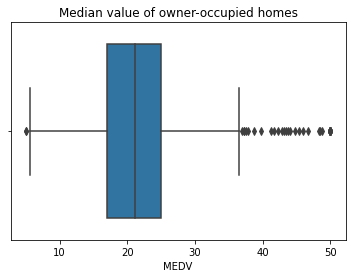

In [7]:
sns.boxplot(x='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')

Quartile distribution of the owner occupied homes ranges from 17 to 25, q1 or 25% of range = 17 q2 or 75% of range = 25 and median = 21


<hr>
Generate the following and explain your findings:

<b>2. Provide a  histogram for the Charles river variable</b>

D:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for the Charles river variable')

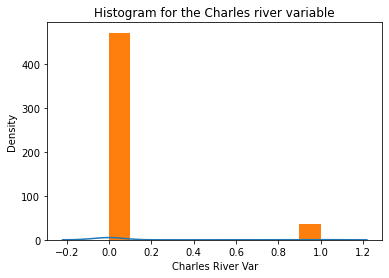

In [25]:
ax=sns.distplot(boston_df['CHAS'])
plt.hist(boston_df['CHAS'])
plt.xlabel('Charles River Var')
plt.title('Histogram for the Charles river variable')

Through the histogram we can say that tract bounds river are majorly found   

<hr>
Generate the following and explain your findings:

<b>3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</b>

<AxesSubplot:xlabel='AGE_Var', ylabel='MEDV'>

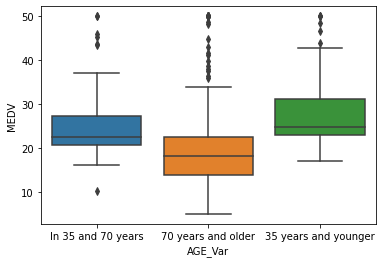

In [34]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_Var'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_Var'] = 'In 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_Var'] = '70 years and older'

sns.boxplot(x='AGE_Var', y='MEDV', data=boston_df)
plt.title('Boxplot for the MEDV variable vs the AGE variable')

<hr>
Generate the following and explain your findings:

<b>4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.</b>

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business')

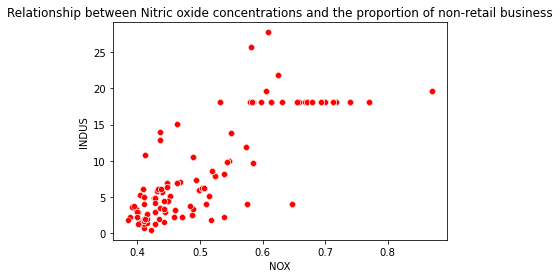

In [37]:
sns.scatterplot(x='NOX', y='INDUS',data=boston_df,color='red')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business')


A linear relation ship is seen between Nitric oxide concentrations and the proportion of non-retail business

<hr>
Generate the following and explain your findings:

<b>5. Create a histogram for the pupil to teacher ratio variable</b>

Text(0.5, 0, 'Pupil To Teacher Ratio')

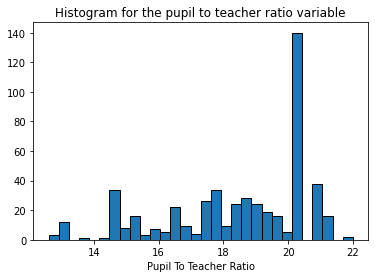

In [54]:
plt.hist(boston_df['PTRATIO'], edgecolor = 'black', bins = 30)
plt.title('Histogram for the pupil to teacher ratio variable')
plt.xlabel('Pupil To Teacher Ratio')

<hr>
<h3>Use the appropriate tests to answer the questions provided</h3>

For each of the following questions; (alpha = 0.05)

<b>1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</b>

In [63]:
# Hypothesis
#H0:There is no significant difference in the mean values of median value of houses and Charles river variables (Null Hypothesis)
#H1:There is a significant difference in the mean values of median value of houses and Charles river variables

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '1']['MEDV'],
                   boston_df[boston_df['CHAS'] == '0']['MEDV'], equal_var = True)


Ttest_indResult(statistic=nan, pvalue=nan)

In [65]:
# As pvalue comes out to be Nan therefore it may be very low thus to cross check lets do regression analysis
x=boston_df['CHAS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           7.39e-05
Time:                        22:39:07   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion:</b> Here we get to confirm that the P value is 0 which without doubt less than 0.05 thus we can reject our null hypothesis and opt the other hypothesis

<hr>
For each of the following questions;

<b>2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</b>

In [67]:
# Hypothesis
#H0: All age groups have same mean values (Null Hypothesis)
#H1: Atleast one age group mean differs

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_Var'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_Var'] = 'In 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_Var'] = '70 years and older'

Thirtyfive_lower= boston_df[boston_df['AGE_Var'] == '35 years and younger']['MEDV']
Thirtyfive_seventy= boston_df[boston_df['AGE_Var'] == 'In 35 and 70 years']['MEDV']
Seventy_older= boston_df[boston_df['AGE_Var'] == '70 years and older']['MEDV']


f_statistic,p_value=scipy.stats.f_oneway(Thirtyfive_lower,Thirtyfive_seventy,Seventy_older)
print("F_statistic:{0}, P-value:{1}".format(f_statistic,p_value))

F_statistic:36.40764999196599, P-value:1.7105011022702984e-15


<b>Conclusion:</b> Here we get to know the P value is 1.7105011022702984e-15 which is less than 0.05 therefore we reject the null hypothesis and opt the other hypothesis

<hr>
For each of the following questions;

<b>3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</b>

In [68]:
# Hypothesis
#H0: there is no correlation between  Nitric oxide concentrations and proportion of non-retail business acres per town (Null Hypothesis)
#H1: there is a correlation between  Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


(0.7636514469209161, 7.913361061230596e-98)

<b>Conclusion:</b> Here we get to know the P value is 7.913361061230596e-98 which is less than 0.05 therefore we reject the null hypothesis and opt the other hypothesis

<hr>
For each of the following questions;

<b>4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>

In [69]:
# Hypothesis
#H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes (Null Hypothesis)
#H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

x= boston_df['DIS']
y= boston_df['MEDV']
x= sm.add_constant(x) 
model=sm.OLS(y,x).fit()
model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        23:02:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion:</b> Here we get to know the P value is 1.21e-08 which is less than 0.05 therefore we reject the null hypothesis and see that for every additional weighted distance, median value of owner occupied homes increases by <b>1.09 unit</b>